https://twitter.com/dannchu/status/1443524638252810248

  0.045648 seconds (133.11 k allocations: 8.295 MiB, 67.98% compilation time)
  0.023296 seconds
  0.038337 seconds
  0.048549 seconds
  0.060114 seconds
  0.072873 seconds
  0.084965 seconds
  0.095718 seconds
  0.104212 seconds
  0.111166 seconds


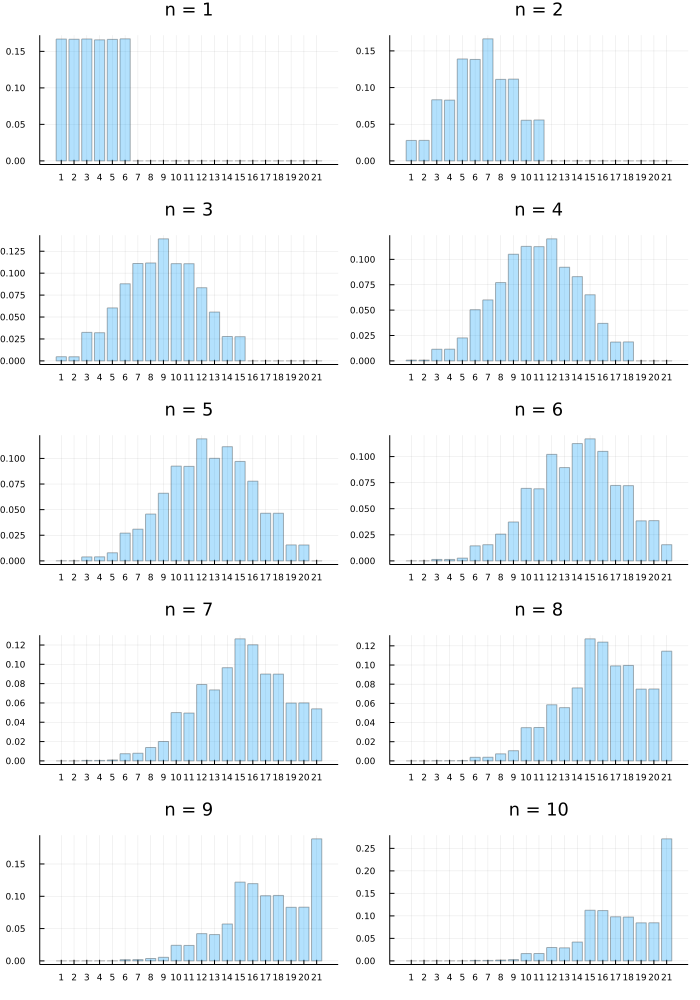

In [1]:
using Plots
default(titlefontsize=12, tickfontsize=6)

function f!(a, n)
    a .= false
    s = 0
    @inbounds for _ in 1:n
        i = rand(1:6)
        a[i] && continue
        a[i] = true
        s += i
        all(a) && break
    end
    s
end

function countf!(X, a, n, L)
    X .= 0
    for _ in 1:L
        @inbounds X[f!(a, n)] +=1
    end
    X
end

X = zeros(Int, 21)
a = falses(6)
L = 10^6
PP = []
for n in 1:10
    @time countf!(X, a, n, L); flush(stdout)
    P = bar(1:21, X/L; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

  0.093116 seconds (315.72 k allocations: 18.809 MiB, 12.50% gc time, 99.94% compilation time)
  0.033185 seconds (104.59 k allocations: 6.150 MiB, 99.92% compilation time)
  0.036704 seconds (126.81 k allocations: 7.415 MiB, 99.68% compilation time)
  0.038305 seconds (138.80 k allocations: 7.969 MiB, 99.74% compilation time)
  0.052832 seconds (157.21 k allocations: 8.951 MiB, 23.00% gc time, 99.50% compilation time)
  0.043479 seconds (172.68 k allocations: 9.736 MiB, 97.16% compilation time)
  0.053259 seconds (187.91 k allocations: 10.466 MiB, 85.76% compilation time)
  0.099802 seconds (204.51 k allocations: 11.267 MiB, 47.78% compilation time)
  0.376464 seconds (222.02 k allocations: 12.143 MiB, 2.64% gc time, 16.34% compilation time)
  2.099821 seconds (240.52 k allocations: 13.084 MiB, 2.65% compilation time)


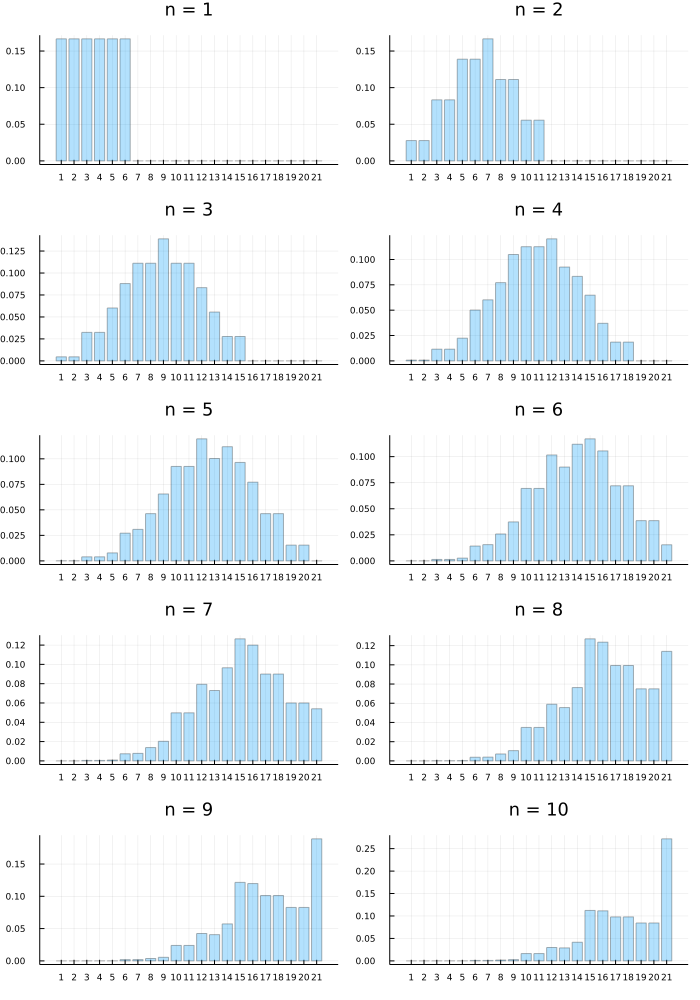

In [2]:
using Plots
default(titlefontsize=12, tickfontsize=6)

function g!(X, a, iter::Iterators.ProductIterator)
    X .= 0
    @inbounds for t in iter
        a .= false
        s = 0
        for i in t
            a[i] && continue
            a[i] = true
            s += i
            all(a) && break
        end
        X[s] += 1
    end
    X
end

function g!(X, a, n)
    iter = Iterators.product(ntuple(_ -> 1:6, n)...)
    g!(X, a, iter)
end

X = zeros(Int, 21)
a = falses(6)
PP = []
for n in 1:10
    @time g!(X, a, n); flush(stdout)
    P = bar(1:21, X/6^n; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

  0.000014 seconds (3 allocations: 96 bytes)
  0.000011 seconds (4 allocations: 160 bytes)
  0.000013 seconds (5 allocations: 224 bytes)
  0.000064 seconds (6 allocations: 288 bytes)
  0.000244 seconds (7 allocations: 352 bytes)
  0.001157 seconds (8 allocations: 416 bytes)
  0.008689 seconds (9 allocations: 480 bytes)
  0.055291 seconds (10 allocations: 544 bytes)
  0.325919 seconds (11 allocations: 608 bytes)
  2.041386 seconds (12 allocations: 672 bytes)


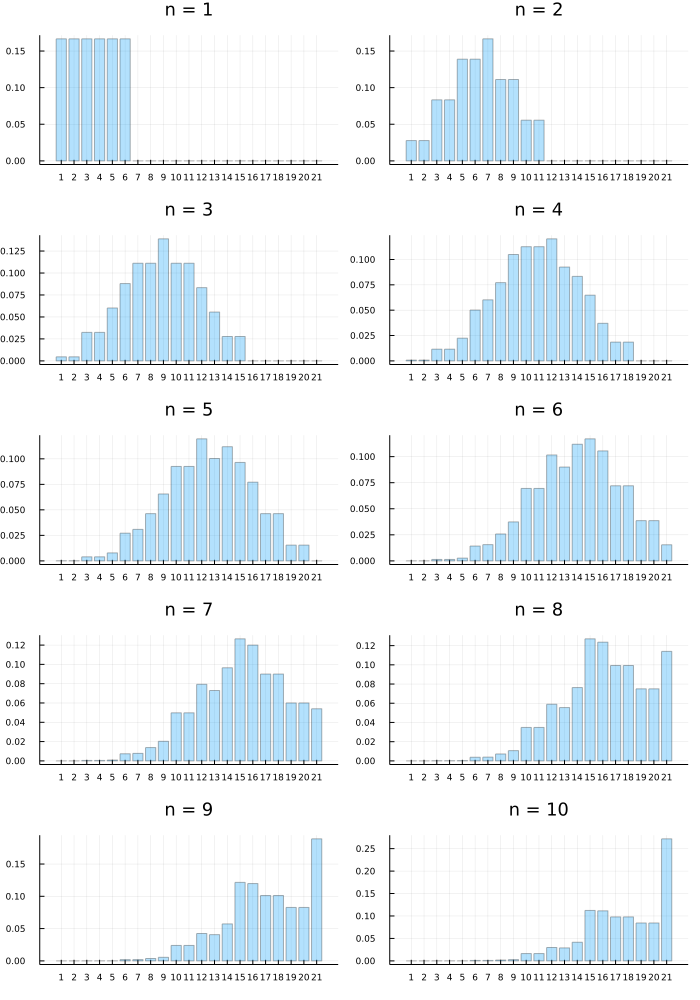

In [3]:
X = zeros(Int, 21)
a = falses(6)
PP = []
for n in 1:10
    @time g!(X, a, n); flush(stdout)
    P = bar(1:21, X/6^n; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

  0.003284 seconds (31 allocations: 2.203 KiB, 47.23% compilation time)
  0.000007 seconds (6 allocations: 192 bytes)
  0.000007 seconds (6 allocations: 192 bytes)
  0.000029 seconds (6 allocations: 192 bytes)
  0.000302 seconds (6 allocations: 192 bytes)
  0.001342 seconds (6 allocations: 192 bytes)
  0.009057 seconds (6 allocations: 192 bytes)
  0.053503 seconds (6 allocations: 192 bytes)
  0.323951 seconds (6 allocations: 192 bytes)
  2.083076 seconds (6 allocations: 192 bytes)


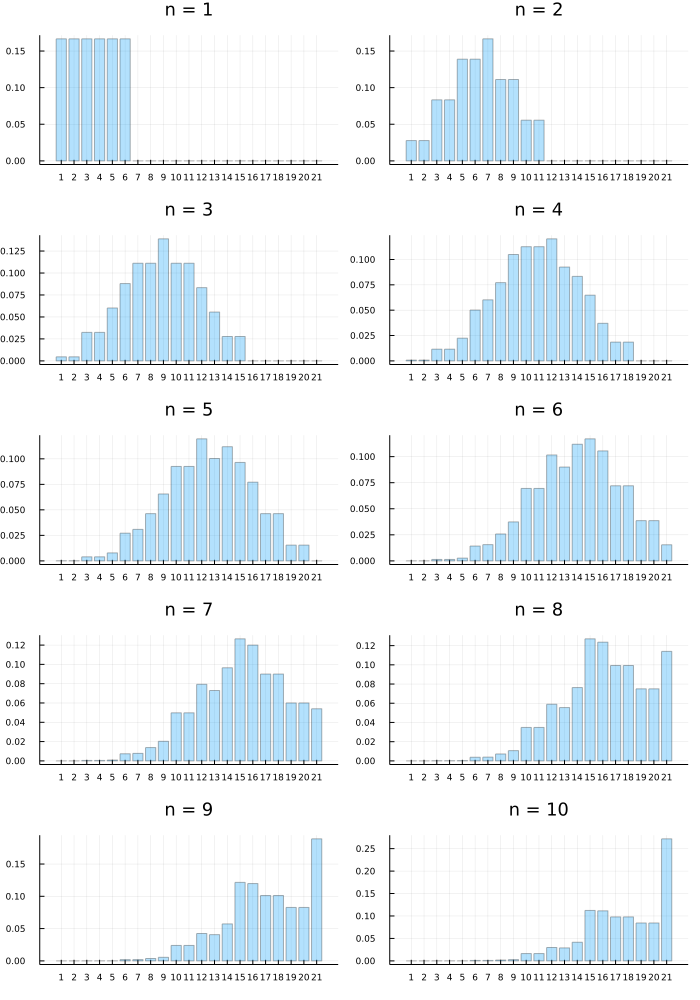

In [4]:
X = zeros(Int, 21)
a = falses(6)
PP = []
for n in 1:10
    iter = Iterators.product(ntuple(_ -> 1:6, n)...)
    @time g!(X, a, iter); flush(stdout)
    P = bar(1:21, X/6^n; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(PP, P)
end
plot(PP...; layout=(5, 2), size=(700, 1000))

In [5]:
@code_warntype g!(X, a, Iterators.product(ntuple(_ -> 1:6, 10)...))

Variables
  #self#::Core.Const(g!)
  X::Vector{Int64}
  a::BitVector
  iter::Base.Iterators.ProductIterator{NTuple{10, UnitRange{Int64}}}
  @_5::Union{Nothing, Tuple{NTuple{10, Int64}, NTuple{10, Tuple{Int64, Int64}}}}
  val::Nothing
  @_7::Union{Nothing, Tuple{Int64, Int64}}
  t::NTuple{10, Int64}
  s::Int64
  i::Int64

Body::Vector{Int64}
1 ──       Core.NewvarNode(:(val))
│    %2  = Base.broadcasted(Base.identity, 0)::Core.Const(Base.Broadcast.Broadcasted(identity, (0,)))
│          Base.materialize!(X, %2)
│          $(Expr(:inbounds, true))
│    %5  = iter::Base.Iterators.ProductIterator{NTuple{10, UnitRange{Int64}}}
│          (@_5 = Base.iterate(%5))
│    %7  = (@_5 === nothing)::Bool
│    %8  = Base.not_int(%7)::Bool
└───       goto #11 if not %8
2 ┄─ %10 = @_5::Tuple{NTuple{10, Int64}, NTuple{10, Tuple{Int64, Int64}}}::Tuple{NTuple{10, Int64}, NTuple{10, Tuple{Int64, Int64}}}
│          (t = Core.getfield(%10, 1))
│    %12 = Core.getfield(%10, 2)::NTuple{10, Tuple{Int64, Int64

  0.325147 seconds (293.27 k allocations: 16.872 MiB, 99.98% compilation time)
  0.000058 seconds (1.88 k allocations: 94.281 KiB)
  0.000078 seconds (2.57 k allocations: 134.547 KiB)
  0.000081 seconds (2.62 k allocations: 131.172 KiB)
  0.000073 seconds (2.34 k allocations: 87.188 KiB)
  0.000075 seconds (2.22 k allocations: 78.031 KiB)
  0.000399 seconds (2.01 k allocations: 120.375 KiB)
  0.000110 seconds (2.01 k allocations: 57.438 KiB)
  0.000115 seconds (2.01 k allocations: 56.297 KiB)
  0.000061 seconds (2.01 k allocations: 58.422 KiB)


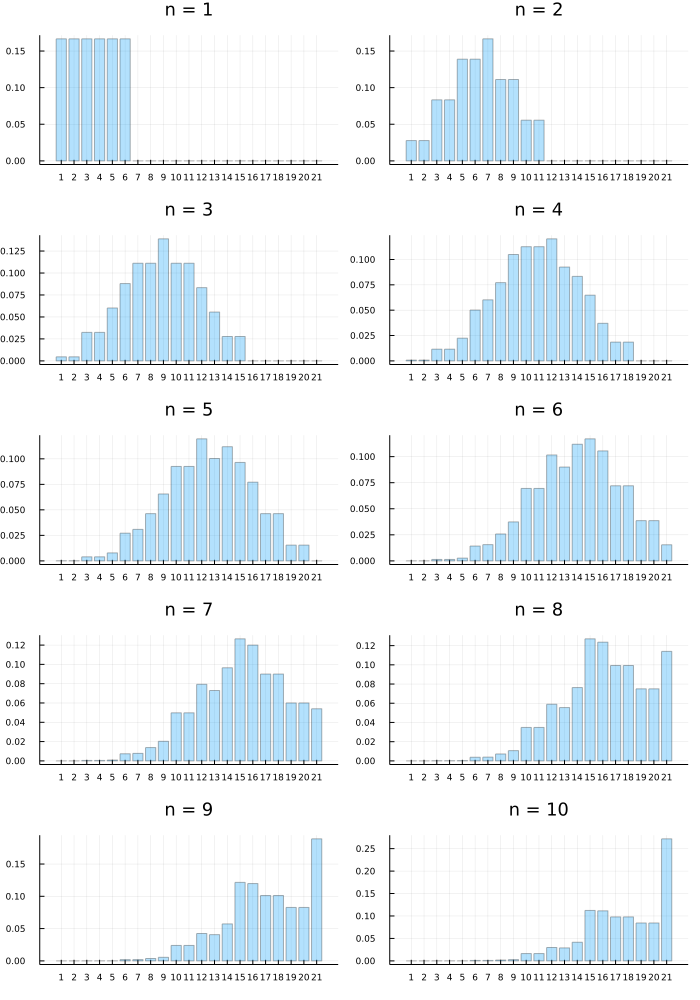

In [6]:
using Combinatorics
using Memoization

P(n, s) = sum(k -> p(n, k) * q(n, k, s), 1:min(6, n))
@memoize p(n, k) = c(n, k)/6^n
c(n, k) = binomial(6, k) * sum(i -> binomial(k, i)*(-1)^(i+k)*i^n, 1:k)
S(k) = (a = binomial(k+1, 2); a:(7k - a))
@memoize B(k, s) = Iterators.filter(A -> sum(A) == s, powerset(1:6, k, k))
@memoize b(k, s) = count(_ -> true, B(k, s))
@memoize q(n, k, s) = b(k, s)/sum(t -> b(k, t), S(k))

X = zeros(21)
QQ = []
for n in 1:10
    @time for s in 1:21
        X[s] = P(n, s)
    end
    Q = bar(1:21, X; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(QQ, Q)
end
plot(QQ...; layout=(5, 2), size=(700, 1000))

  0.000018 seconds (168 allocations: 4.922 KiB)
  0.000021 seconds (231 allocations: 6.891 KiB)
  0.000019 seconds (294 allocations: 8.859 KiB)
  0.000039 seconds (357 allocations: 10.828 KiB)
  0.000077 seconds (420 allocations: 12.797 KiB)
  0.000041 seconds (483 allocations: 14.766 KiB)
  0.000049 seconds (483 allocations: 14.766 KiB)
  0.000057 seconds (483 allocations: 14.766 KiB)
  0.000079 seconds (483 allocations: 14.766 KiB)
  0.000033 seconds (483 allocations: 14.766 KiB)


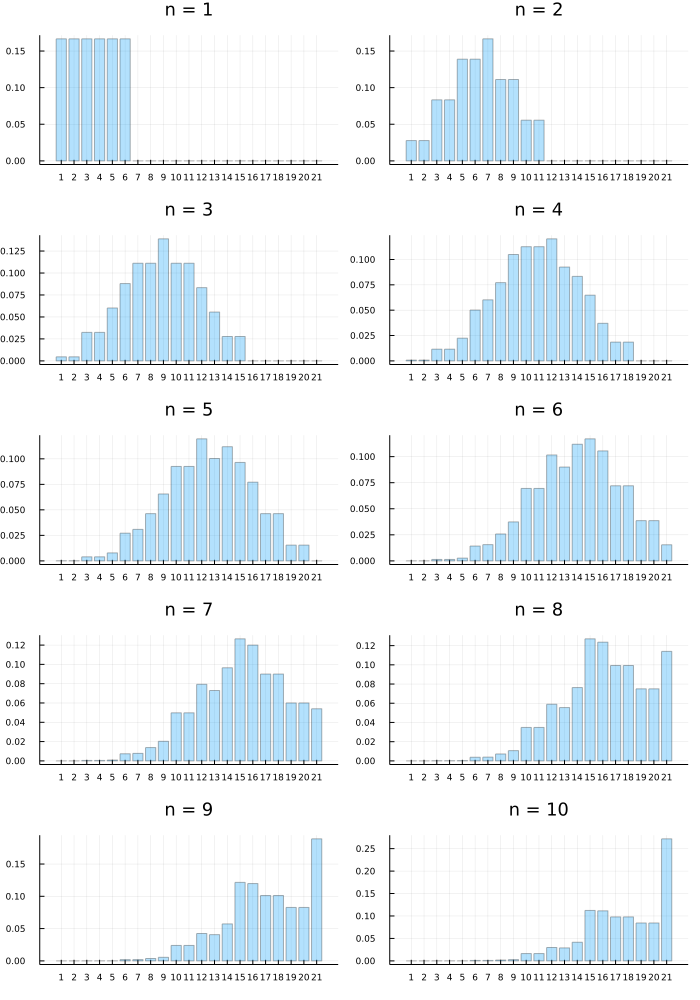

In [7]:
X = zeros(21)
QQ = []
for n in 1:10
    @time for s in 1:21
        X[s] = P(n, s)
    end
    Q = bar(1:21, X; alpha=0.3, xtick=1:21, label="", title="n = $n")
    push!(QQ, Q)
end
plot(QQ...; layout=(5, 2), size=(700, 1000))

In [8]:
@memoize G(n) = g!(zeros(Int, 21), falses(6), n)
g(n, s) = G(n)[s]/6^n

ENV["COLUMNS"] = 130
@time M = [round(g(n, s) - P(n, s); digits = 16) for n in 1:10, s in 1:21]

  2.597145 seconds (414.66 k allocations: 24.391 MiB, 4.29% compilation time)


10×21 Matrix{Float64}:
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  -0.0  -0.0   0.0   0.0  -0.0  -0.0  -0.0  -0.0  -0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  -0.0  -0.0  -0.0   0.0  -0.0  -0.0   0.0   0.0   0.0   0.0  -0.0  -0.0  -0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -0.0  -0.0   0.0   0.0   0.0   0.0   0.0  -0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -0.0  -0.0   0.0   0.0   0.0   0.0   0.0  -0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.0  -0.0   0.0   0.0   0.0  -0.0  -0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0   0.0  -0.0  -0.0  -0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0